# Looking at the data

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
filename = 'train.csv'
df = pd.read_csv(filename, header = 0, delimiter = ',')

In [3]:
df.shape

(18000, 12)

In [4]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,28987,191,20,175953,217,28,5,unsat,very_little,considering,1
1,zero,45201,0,0,841177,160,1,15,unsat,avg,actively_looking_into_it,0
2,one,110663,0,0,902611,529,1,13,very_unsat,high,perhaps,0
3,zero,40646,169,71,772903,146,24,2,very_unsat,little,considering,1
4,one,132530,0,10,196535,559,0,6,very_unsat,avg,perhaps,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
COLLEGE                        18000 non-null object
INCOME                         18000 non-null int64
OVERAGE                        18000 non-null int64
LEFTOVER                       18000 non-null int64
HOUSE                          18000 non-null int64
HANDSET_PRICE                  18000 non-null int64
OVER_15MINS_CALLS_PER_MONTH    18000 non-null int64
AVERAGE_CALL_DURATION          18000 non-null int64
REPORTED_SATISFACTION          18000 non-null object
REPORTED_USAGE_LEVEL           18000 non-null object
CONSIDERING_CHANGE_OF_PLAN     18000 non-null object
LEAVE                          18000 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.6+ MB


In [6]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                           int64
dtype: object

In [7]:
df.isnull().any()

COLLEGE                        False
INCOME                         False
OVERAGE                        False
LEFTOVER                       False
HOUSE                          False
HANDSET_PRICE                  False
OVER_15MINS_CALLS_PER_MONTH    False
AVERAGE_CALL_DURATION          False
REPORTED_SATISFACTION          False
REPORTED_USAGE_LEVEL           False
CONSIDERING_CHANGE_OF_PLAN     False
LEAVE                          False
dtype: bool

In [8]:
df.shape

(18000, 12)

In [9]:
#test.describe()

In [10]:
df.loc[df['OVERAGE'] == -2]

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
8498,zero,92956,-2,0,816777,274,4,2,very_unsat,very_high,considering,0


In [11]:
test = df
test.loc[test['OVERAGE'] == -2]



,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
8498,zero,92956,-2,0,816777,274,4,2,very_unsat,very_high,considering,0


In [12]:
#test = test.drop(index=8498, axis =0)

In [13]:
#test.iloc[8498]

In [14]:
#df.iloc[8498]

In [15]:
#df = test
#df.info()

In [16]:
df['LEAVE'].value_counts()

0    9106
1    8894
Name: LEAVE, dtype: int64

In [17]:
df.groupby('LEAVE').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
LEAVE,,,,,,,
0,76316.473534,65.756424,22.261146,546953.57852,370.648693,6.203931,6.049418
1,84604.298403,106.852822,25.580391,438319.60434,410.641444,9.853047,5.961660


In [18]:
df['COLLEGE'] = df['COLLEGE'].astype(str)

In [19]:
df.groupby('LEAVE').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
LEAVE,,,,,,,
0,76316.473534,65.756424,22.261146,546953.57852,370.648693,6.203931,6.049418
1,84604.298403,106.852822,25.580391,438319.60434,410.641444,9.853047,5.961660


for x in df['COLLEGE']:
    if x is 'one':
        df['COLLEGE'].str.replace('one','1')
    else: 
        df['COLLEGE'].str.replace('zero','0')

In [20]:
df.groupby('REPORTED_SATISFACTION').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE
REPORTED_SATISFACTION,,,,,,,,
avg,79727.667035,84.640487,23.596792,499801.858960,390.062500,7.637168,6.055310,0.476770
sat,82011.881210,85.597192,24.424406,479487.074514,404.425486,7.820734,5.910367,0.461123
unsat,80104.956010,87.032222,23.908378,483439.400392,387.047913,8.112076,6.016251,0.509106
very_sat,80260.010577,83.657779,24.135963,494286.926620,391.094094,7.859850,5.948215,0.490965
very_unsat,80626.246403,87.522978,23.758067,497675.340411,389.926247,8.165386,6.037575,0.497276


In [21]:
df.groupby('COLLEGE').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE
COLLEGE,,,,,,,,
one,80917.668319,85.720864,23.744657,492915.042300,392.611919,7.946464,6.00727,0.501322
zero,79896.642569,86.410334,24.060525,493643.924344,388.168684,8.068594,6.00482,0.486774


In [22]:
df.groupby('REPORTED_USAGE_LEVEL').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE
REPORTED_USAGE_LEVEL,,,,,,,,
avg,82197.858903,85.522956,23.920493,498221.000000,398.847704,7.861142,5.879059,0.483763
high,80415.259259,84.462134,23.069652,490782.482034,382.181316,8.321172,6.159204,0.485904
little,80262.583451,86.673680,24.025699,491718.856538,393.962158,8.003671,6.013132,0.490822
very_high,80422.684726,86.971062,23.825936,495791.617276,389.745213,7.993908,6.046127,0.501088
very_little,80246.483702,84.646685,24.164088,493156.289779,386.333149,7.909116,5.896133,0.498343


In [23]:
df.groupby('CONSIDERING_CHANGE_OF_PLAN').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE
CONSIDERING_CHANGE_OF_PLAN,,,,,,,,
actively_looking_into_it,80421.375615,88.368456,24.113199,489830.130425,391.430649,8.095749,5.942953,0.495973
considering,80222.750243,86.211910,24.167386,494897.659802,388.797829,8.097676,5.990260,0.490886
never_thought,79211.485003,84.709677,22.421053,498432.727221,387.312960,7.811545,6.111488,0.484437
no,81067.017024,83.648545,23.696046,492625.321527,392.149918,7.833333,6.012081,0.496980
perhaps,81532.347966,85.851178,24.438972,490076.694861,396.996788,7.931478,6.206638,0.517131


Observations on features that seem to have an effect:
Categorical Data    
    1. college: seems to barely make a difference, .02 more likely to leave if person went to college
    2. REPORTED_SATISFACTION: unsat has slightly over 50% chance of leaving and very_unsat has a bit lower than half chance of leaving. These are the 2 highest chances of leaving based on sat ranking. ALSO, sat ranking may be tied with the OVERAGE. These 2 categories had the highest overage, so maybe there are high overcharge fees or they just got upset about being overcharged. 
    3. REPORTED_USAGE_LEVEL: very high usage has slightly over 50% churn (highest in group) followed by very little. So the rates are probably expensive if you're a heavy user or too pricey to be for a casual user
    4. CONSIDERING_CHANGE_OF_PLAN: Those who had the highest overage are most looking into changing plans. Those with highest overage also happen to have lowest estimated house value. HOWEVER!!! Those that chose to leave are "perhaps" (51.7) and the next are "no"(49.69) and then "actively looking into it"(.4959). Maybe if we were to average all these values on a scale where perhaps is 3 and no is 2, the values in between the range of 2-3, this could tell us something. 

Number Data
    1. INCOME: those who left had higher income than those who didnt
    2. OVERAGE: those who left had ALMOST DOUBLE overage than those who didn't
    3. LEFTOVER: those who left had more leftover minutes per month
    4. HOUSE: those who left had cheaper house value
    5. HANDSET $$: those who left had more expensive handsets
    6. OVER 15 MIN: those who left had more over 15 min calls (maybe related to overage)
    7. AVG CALL DURATION: those who left had slightly lover avg call duration but both are pretty close to 6 min
    
why are income and house indirectly related here?    
correlation between high overage and cheaper house value
correlation between income and handset price
correlation between satisfaction and high overage = higher overage, less satisfaction

Features to include:
    ***OVERAGE --> higher overage, more chance of leaving
    LEFTOVER --> those who had more leftover minutes, less usage = higher chance of leaving
    House value? --> those who had cheaper houses AND high overage are more likely to leave

In [24]:
df.groupby('LEAVE').mean()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
LEAVE,,,,,,,
0,76316.473534,65.756424,22.261146,546953.57852,370.648693,6.203931,6.049418
1,84604.298403,106.852822,25.580391,438319.60434,410.641444,9.853047,5.961660


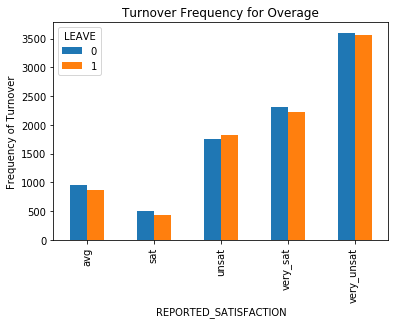

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df['REPORTED_SATISFACTION'],df['LEAVE']).plot(kind='bar')
plt.title('Turnover Frequency for Overage')
plt.xlabel('REPORTED_SATISFACTION')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

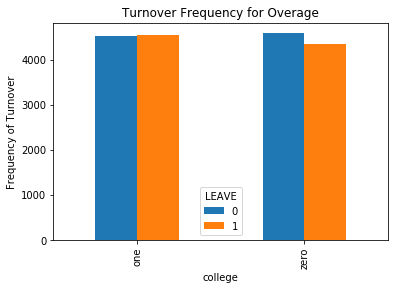

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df['COLLEGE'],df['LEAVE']).plot(kind='bar')
plt.title('Turnover Frequency for Overage')
plt.xlabel('college')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

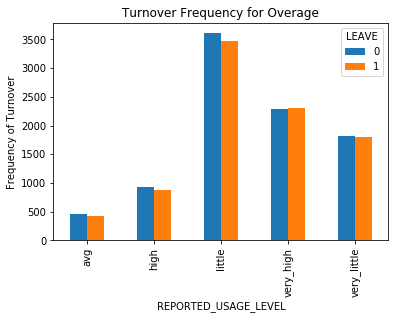

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df['REPORTED_USAGE_LEVEL'],df['LEAVE']).plot(kind='bar')
plt.title('Turnover Frequency for Overage')
plt.xlabel('REPORTED_USAGE_LEVEL')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

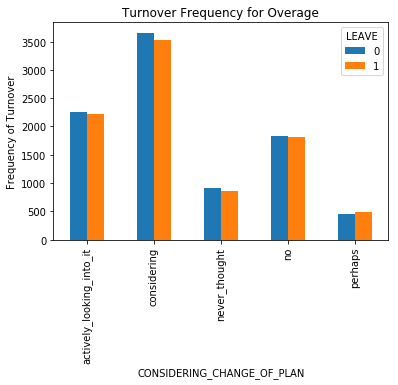

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df['CONSIDERING_CHANGE_OF_PLAN'],df['LEAVE']).plot(kind='bar')
plt.title('Turnover Frequency for Overage')
plt.xlabel('CONSIDERING_CHANGE_OF_PLAN')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

Categorical Data

    REPORTED_SATISFACTION: highest reportings of very unsatisfied followed by very satisfied
    COLLEGE: more variability in people staying vs leaving in those who didnt go to college
    REPORTED_USAGE_LEVEL: most variety in people who report little, also most people by far report little usage, then very high then very little
    CONSIDERING_CHANGE_OF_PLAN: most people report considering, which also has most variance, then actively looking into it, then no. 
    
Conclusions: Don't really trust the categorical data. 



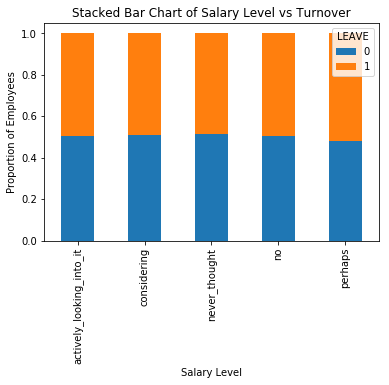

In [29]:
table=pd.crosstab(df['CONSIDERING_CHANGE_OF_PLAN'],df['LEAVE'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

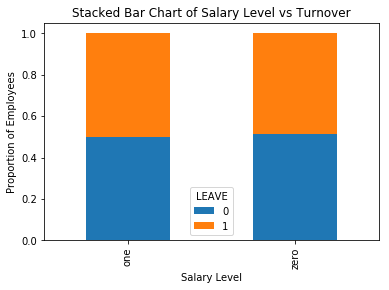

In [30]:
table=pd.crosstab(df['COLLEGE'],df['LEAVE'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

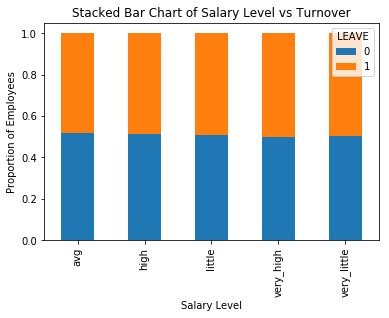

In [31]:
table=pd.crosstab(df['REPORTED_USAGE_LEVEL'],df['LEAVE'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

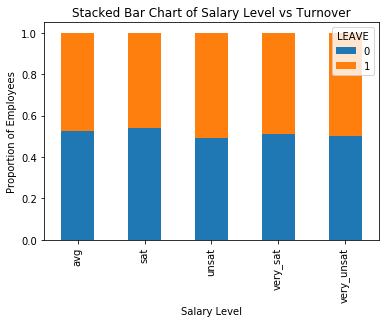

In [32]:
table=pd.crosstab(df['REPORTED_SATISFACTION'],df['LEAVE'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

# Manipulating data for training model and Feature Selection

In [33]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics, datasets, linear_model, model_selection
from scipy.stats import linregress
import seaborn as sns

In [34]:
cat_vars=['COLLEGE','REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [35]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,zero,28987,191,20,175953,217,28,5,unsat,very_little,...,0,0,0,0,1,0,1,0,0,0
1,zero,45201,0,0,841177,160,1,15,unsat,avg,...,1,0,0,0,0,1,0,0,0,0
2,one,110663,0,0,902611,529,1,13,very_unsat,high,...,0,1,0,0,0,0,0,0,0,1
3,zero,40646,169,71,772903,146,24,2,very_unsat,little,...,0,0,1,0,0,0,1,0,0,0
4,one,132530,0,10,196535,559,0,6,very_unsat,avg,...,1,0,0,0,0,0,0,0,0,1


In [36]:
df.drop(df.columns[[0,8,9,10]], axis=1, inplace=True) #drop categorical data
df.columns.values

array(['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'LEAVE',
       'COLLEGE_one', 'COLLEGE_zero', 'REPORTED_SATISFACTION_avg',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat',
       'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_avg',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high',
       'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no',
       'CONSIDERING_CHANGE_OF_PLAN_perhaps'], dtype=object)

In [37]:
#25 columns
df.columns.shape

(25,)

In [38]:
df.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,COLLEGE_one,COLLEGE_zero,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,28987,191,20,175953,217,28,5,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,45201,0,0,841177,160,1,15,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,110663,0,0,902611,529,1,13,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,40646,169,71,772903,146,24,2,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,132530,0,10,196535,559,0,6,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [39]:
df_vars=df.columns.values.tolist()
y=['LEAVE']
X=[i for i in df_vars if i not in y]

The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.


'OVER_15MINS_CALLS_PER_MONTH', 
'COLLEGE_one',
'COLLEGE_zero',
'REPORTED_SATISFACTION_avg',
'REPORTED_SATISFACTION_sat',
'REPORTED_SATISFACTION_very_sat',
'REPORTED_SATISFACTION_very_unsat',
'REPORTED_USAGE_LEVEL_avg',
'REPORTED_USAGE_LEVEL_high',
'REPORTED_USAGE_LEVEL_little',
'REPORTED_USAGE_LEVEL_very_high',
'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
'CONSIDERING_CHANGE_OF_PLAN_considering',
'CONSIDERING_CHANGE_OF_PLAN_never_thought',
'CONSIDERING_CHANGE_OF_PLAN_no'



i agree with these ones!
'OVERAGE', 'LEFTOVER', 
but it really thinks these are important:
'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION'

In [40]:
#Standardization##########
#from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()
#X_train_scale = scaler.fit_transform(df[X])

In [41]:
lrmodel = LogisticRegression()
lrfe = RFE(lrmodel, 10) #pick number of columns you want
lrfe = lrfe.fit(df[X], df[y])
print(lrfe.support_)
print(lrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs'

[False False False False False False False False  True  True  True False
  True  True False  True False False False  True  True  True  True False]
[14 11  9 15 13  2  7  3  1  1  1 12  1  1  4  1  5  6  8  1  1  1  1 10]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
#### Features for LR
lrfeatures = [
 'COLLEGE_one',
 'COLLEGE_zero',
 'REPORTED_SATISFACTION_avg',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',

 'REPORTED_USAGE_LEVEL_high',

 'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no'
]


In [43]:
## for Random Forest
rfmodel = RandomForestClassifier()
rfrfe = RFE(rfmodel, 5) #pick number of columns you want#########################
rfrfe = rfrfe.fit(df[X], df[y])
print(rfrfe.support_)
print(rfrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/fo

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False]
[ 1  1  1  1  1  2  3  7 17 15 19 13  9  4 20 14  6 11 10  8  5 16 12 18]


### features for RT
rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'COLLEGE_zero', #########
 'REPORTED_SATISFACTION_very_unsat',
 'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',#######
 'CONSIDERING_CHANGE_OF_PLAN_considering'
]

# Features for RT*****

###### KEEP THIS, its 67.2

rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'REPORTED_SATISFACTION_very_unsat',
 'CONSIDERING_CHANGE_OF_PLAN_considering'
]

######X features important
rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'COLLEGE_zero',
 'REPORTED_SATISFACTION_avg',
 'REPORTED_SATISFACTION_unsat',
]

In [44]:
rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE']

67.somethin'
rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION', 
  ###college_one
 'REPORTED_SATISFACTION_very_unsat', 
 'REPORTED_USAGE_LEVEL_little',  ####          
 'CONSIDERING_CHANGE_OF_PLAN_considering']              

###rffeatures important #### 67.3! :D
rffeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'COLLEGE_zero',
 'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'REPORTED_SATISFACTION_very_unsat'] 

In [45]:
#rffeatures = X
#rffeatures


In [46]:
X

['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'COLLEGE_zero',
 'REPORTED_SATISFACTION_avg',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',
 'REPORTED_SATISFACTION_very_sat',
 'REPORTED_SATISFACTION_very_unsat',
 'REPORTED_USAGE_LEVEL_avg',
 'REPORTED_USAGE_LEVEL_high',
 'REPORTED_USAGE_LEVEL_little',
 'REPORTED_USAGE_LEVEL_very_high',
 'REPORTED_USAGE_LEVEL_very_little',
 'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no',
 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

In [47]:
## for SVC
#svcmodel = SVC()
#svcrfe = RFE(svcmodel, 15) #pick number of columns you want
#svcrfe = svcrfe.fit(df[X], df[y])
#print(svcrfe.support_)
#print(svcrfe.ranking_)

In [48]:
## for decision tree
dtmodel = DecisionTreeClassifier()
dtrfe = RFE(dtmodel, 10) #pick number of columns you want
dtrfe = dtrfe.fit(df[X], df[y])
print(dtrfe.support_)
print(dtrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True False False False False
 False False False False  True False False  True False False False False]
[ 1  1  1  1  1  1  1  1  9 14 11  7  6  8 15 13  1  2  4  1  3 10  5 12]


In [49]:
### decision tree features
dtfeatures = ['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',

 'REPORTED_USAGE_LEVEL_little',
              
 'CONSIDERING_CHANGE_OF_PLAN_considering'
]

In [50]:
#### without changing the categorical data ######
test = pd.read_csv(filename, header = 0, delimiter = ',')
test.drop(test.columns[[0,8,9,10]], axis=1, inplace=True) #drop categorical data
test.columns.values

array(['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'LEAVE'],
      dtype=object)

In [51]:
test_vars=test.columns.values.tolist()
testy=['LEAVE']
testX=[i for i in test_vars if i not in testy]

In [52]:
testX

['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION']

In [53]:
## Logistic regression feature selection
lrfe = RFE(lrmodel, 4) #pick number of columns you want
lrfe = lrfe.fit(test[testX], test[testy])
print(lrfe.support_)
print(lrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True  True False False  True  True]
[3 1 1 4 2 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
lrtestfeatures = ['OVERAGE',
 'LEFTOVER',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION']

In [55]:
## for Random Forest
rfrfe = RFE(rfmodel, 4) #pick number of columns you want
rfrfe = rfrfe.fit(test[testX], test[testy])
print(rfrfe.support_)
print(rfrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/fo

[ True  True False  True  True False False]
[1 1 2 1 1 3 4]


In [56]:
rftestfeatures = ['INCOME',
 'OVERAGE',
 'HOUSE',
 'HANDSET_PRICE',
]

In [57]:
## for decision tree
dtrfe = RFE(dtmodel, 4) #pick number of columns you want
dtrfe = dtrfe.fit(test[testX], test[testy])
print(dtrfe.support_)
print(dtrfe.ranking_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True False  True  True False False]
[1 1 2 1 1 3 4]


In [58]:
dttestfeatures = ['INCOME',
 'OVERAGE',
 'HOUSE',
 'HANDSET_PRICE',
]

In [59]:
#test_vars=test.columns.values.tolist()
#yt=['LEAVE']
#Xt=[i for i in test_vars if i not in yt]

#testmodel = LogisticRegression()
#rfe = RFE(testmodel, 4) #pick number of columns you want, this tests which cols might be most important
#rfe = rfe.fit(test[Xt], test[yt])
#print(rfe.support_)
#print(rfe.ranking_)

In [60]:
#Xt
#Xtest

# Logistic Regression

In [61]:
from sklearn.model_selection import train_test_split
y=df['LEAVE']
lr_X=df[lrfeatures]
lr_testX=df[lrtestfeatures]

#for manipulated features
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(lr_X_train, lr_y_train)

#for unchanged features - categoricals
lr_Xt_train, lr_Xt_test, lr_yt_train, lr_yt_test = train_test_split(lr_testX, y, test_size=0.3, random_state=0)
lrtest = LogisticRegression()
lrtest.fit(lr_Xt_train, lr_yt_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
#manipulated features stats
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
lr_y_pred1 = lr.predict(lr_X_test)
lr_lin_mse1 = mean_squared_error(lr_y_pred1, lr_y_test)
lr_lin_rmse1 = np.sqrt(lr_lin_mse1)

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(lr_y_test, lr.predict(lr_X_test))))
print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f"% lr_lin_rmse1) #how off the prediction is
print('Variance/R^2 score: %.4f' % r2_score(lr_y_test, lr_y_pred1)) #closer to 1 = less error

Logistic regression accuracy: 0.503
Coefficients: 
 [[ 0.06500727  0.00758257 -0.06383925 -0.16016741  0.01331106  0.01008554
  -0.08881867 -0.13215684 -0.18226441 -0.12977007]]
Mean squared error: 0.71
Variance/R^2 score: -0.9894


In [63]:
#unmanipulated features stats
lr_y_pred2 = lrtest.predict(lr_Xt_test)
lr_lin_mse2 = mean_squared_error(lr_y_pred2, lr_yt_test)
lr_lin_rmse2 = np.sqrt(lr_lin_mse2)

print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(lr_yt_test, lrtest.predict(lr_Xt_test))))
print('Coefficients: \n', lrtest.coef_)
print("Mean squared error: %.2f"% lr_lin_rmse2) #how off the prediction is
print('Variance/R^2 score: %.4f' % r2_score(lr_yt_test, lr_y_pred2)) #closer to 1 = less error



Logistic regression accuracy: 0.611
Coefficients: 
 [[0.00506817 0.00819218 0.01119053 0.02990223]]
Mean squared error: 0.62
Variance/R^2 score: -0.5567


# Random Forest

In [64]:
#y=df['LEAVE']
rf_X=df[rffeatures]
rf_testX=df[rftestfeatures]

## TO IMPROVE MODEL WE CAN CHANGE TEST SIZE, RANDOM_STATE, PARAMETERS IN THE CLASSIFIER MODEL
#for manipulated features
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier(max_features= 'auto', n_estimators= 2000, random_state=100, min_samples_leaf = 55)
rf.fit(rf_X_train, rf_y_train)

#for unchanged features - categoricals
rf_Xt_train, rf_Xt_test, rf_yt_train, rf_yt_test = train_test_split(rf_testX, y, test_size=0.3, random_state=0)
rftest = RandomForestClassifier()
rftest.fit(rf_Xt_train, rf_yt_train)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
#try to do better than 67.6 !!! :D 69.8, 70.6.!!!!
#for manipulated features
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(rf_y_test, rf.predict(rf_X_test))))

Random Forest Accuracy: 0.706


In [66]:
#for unchanged features - categoricals
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(rf_yt_test, rftest.predict(rf_Xt_test))))

Random Forest Accuracy: 0.641


# Support Vector Machine

In [67]:
#y=df['LEAVE']
sv_X=df[X]
sv_testX=df[testX]

#for manipulated features
sv_X_train, sv_X_test, sv_y_train, sv_y_test = train_test_split(sv_X, y, test_size=0.3, random_state=0)
svc = SVC()
svc.fit(sv_X_train, sv_y_train)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(sv_y_test, svc.predict(sv_X_test))))

Support vector machine accuracy: 0.508


In [69]:
#svc = SVC()
#svc.fit(Xt_train, yt_train)
## with test, Support vector machine accuracy: 0.507
#print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(yt_test, svc.predict(Xt_test))))

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest model.

# Decision Tree

In [70]:
#y=df['LEAVE']
dt_X=df[dtfeatures]
dt_testX=df[dttestfeatures]

#for manipulated features
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, y, test_size=0.3, random_state=0)
dtClf = DecisionTreeClassifier()
dtClf.fit(dt_X_train, dt_y_train)
dt_y_pred = dtClf.predict(dt_X_test)

#for unchanged features - categoricals
dt_Xt_train, dt_Xt_test, dt_yt_train, dt_yt_test = train_test_split(dt_testX, y, test_size=0.3, random_state=0)
dttestClf = DecisionTreeClassifier()
dttestClf.fit(dt_Xt_train, dt_yt_train)
dt_yt_pred = dttestClf.predict(dt_Xt_test)

In [71]:
print('Manipulated Decision Tree Accuracy: {:.3f}'.format(accuracy_score(dt_y_test, dtClf.predict(dt_X_test))))
print('Unmanipulated col set Decision Tree Accuracy: {:.3f}'.format(accuracy_score(dt_yt_test, dttestClf.predict(dt_Xt_test))))

Manipulated Decision Tree Accuracy: 0.616
Unmanipulated col set Decision Tree Accuracy: 0.590


# Neural Network and Standardization

In [72]:
# Convert string to number
import pandas as pd
import numpy as np

def ConvertStrToNumColumn(col):
    # print(col)
    if( type(col[0]) == str):
        strDic = {}
        xCategory = 0
        for i, row in enumerate(col):
            if row in strDic.keys():
                col[i] = strDic[row]
            else:
                col[i] = xCategory;
                strDic[row] = xCategory
                xCategory += 1;

    return col

def ConvertStrToNumMatrix(readFileName, writeFileName):
    targetMatrix = pd.read_csv(readFileName).values

    for colNum in range(targetMatrix.shape[1]):
        targetMatrix[:, colNum] = ConvertStrToNumColumn(targetMatrix[:, colNum])

    np.savetxt(writeFileName, targetMatrix)

ConvertStrToNumMatrix('train.csv', 'trainNum.txt')
ConvertStrToNumMatrix('test.csv', 'testNum.txt')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

trainData = np.loadtxt('trainNum.txt')
# testData = np.loadtxt('testNum.txt')

np.random.shuffle(trainData)

X_train = trainData[:, :-1]
y_train = trainData[:, -1]; y_train = y_train.astype(float)

from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

#Standardization##########
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
##########################
numFetures = X_train.shape[1]
neuralClf = MLPClassifier(hidden_layer_sizes=(numFetures, numFetures, numFetures
            , numFetures), max_iter=500)
neuralClf.fit(X_train, y_train)
score = neuralClf.score(X_test, y_test)
print(score)

0.6811111111111111


# Cross Validation

In [73]:
#LR unmanipulated
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, lr_Xt_train, lr_yt_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

10-fold cross validation average accuracy: 0.616


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
#rf manipulated, 67.5!
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, rf_X_train, rf_y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

10-fold cross validation average accuracy: 0.669


In [75]:
#dt manipulated
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, dt_X_train, dt_y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.623


# Confusion Matrices

In [76]:
##RANDOM FOREST
from sklearn.metrics import classification_report
print(classification_report(rf_y_test, rf.predict(rf_X_test)))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      2742
           1       0.68      0.75      0.72      2658

   micro avg       0.71      0.71      0.71      5400
   macro avg       0.71      0.71      0.71      5400
weighted avg       0.71      0.71      0.71      5400



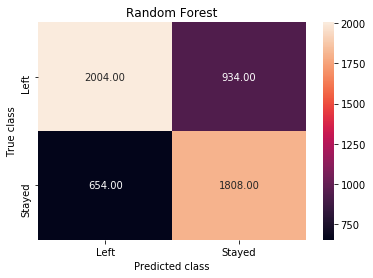

In [77]:
y_pred = rf.predict(rf_X_test)
forest_cm = metrics.confusion_matrix(y_pred, rf_y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [78]:
## LOGISTIC REGRESSION
print(classification_report(lr_yt_test, lrtest.predict(lr_Xt_test)))

              precision    recall  f1-score   support

           0       0.60      0.72      0.65      2742
           1       0.63      0.50      0.56      2658

   micro avg       0.61      0.61      0.61      5400
   macro avg       0.62      0.61      0.60      5400
weighted avg       0.61      0.61      0.61      5400



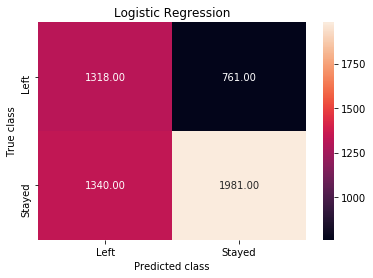

In [79]:
logreg_y_pred = lrtest.predict(lr_Xt_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, lr_yt_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

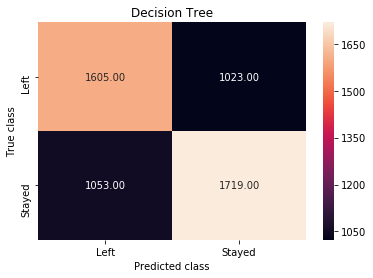

In [80]:
dt_y_pred = dtClf.predict(dt_X_test)
dt_cm = metrics.confusion_matrix(dt_y_pred, dt_y_test, [1,0])
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree')
plt.savefig('Decision_Tree')

In [81]:
## Support Vector Machine
#print(classification_report(sv_y_test, svc.predict(df[X])))

In [82]:
#svc_y_pred = svc.predict(Xt_test)
#svc_cm = metrics.confusion_matrix(svc_y_pred, yt_test, [1,0])
#sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
#plt.ylabel('True class')
#plt.xlabel('Predicted class')
#plt.title('Support Vector Machine')
#plt.savefig('support_vector_machine')

# ROC Curve

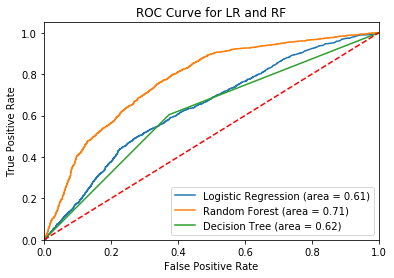

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
#lr test, dt manipulated, rf manipulated
logit_roc_auc = roc_auc_score(lr_yt_test, lrtest.predict(lr_Xt_test))
fpr, tpr, thresholds = roc_curve(lr_yt_test, lrtest.predict_proba(lr_Xt_test)[:,1])

rf_roc_auc = roc_auc_score(rf_y_test, rf.predict(rf_X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(rf_y_test, rf.predict_proba(rf_X_test)[:,1])

dt_roc_auc = roc_auc_score(dt_y_test, dtClf.predict(dt_X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(dt_y_test, dtClf.predict_proba(dt_X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LR and RF')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Random Forest Feature Importance, can help us choose features

In [84]:
### Random Forest Model Feature Importance
feature_labels = np.array(rffeatures)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

HANDSET_PRICE-7.46%
INCOME-12.92%
LEFTOVER-13.77%
OVERAGE-31.82%
HOUSE-34.02%


X features important
COLLEGE_zero-0.98%
COLLEGE_one-1.12%
REPORTED_SATISFACTION_unsat-1.61%
REPORTED_SATISFACTION_sat-1.67%
REPORTED_SATISFACTION_avg-1.87%
AVERAGE_CALL_DURATION-6.86%
OVER_15MINS_CALLS_PER_MONTH-8.87%
LEFTOVER-10.04%
OVERAGE-13.25%
INCOME-15.17%
HANDSET_PRICE-15.34%
HOUSE-23.21%

rffeatures important
COLLEGE_zero-0.98%
COLLEGE_one-1.12%
CONSIDERING_CHANGE_OF_PLAN_considering-1.61%
CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it-1.67%
REPORTED_SATISFACTION_very_unsat-1.87%
AVERAGE_CALL_DURATION-6.86%
OVER_15MINS_CALLS_PER_MONTH-8.87%
LEFTOVER-10.04%
OVERAGE-13.25%
INCOME-15.17%
HANDSET_PRICE-15.34%
HOUSE-23.21%

In [85]:
X

['INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'COLLEGE_one',
 'COLLEGE_zero',
 'REPORTED_SATISFACTION_avg',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',
 'REPORTED_SATISFACTION_very_sat',
 'REPORTED_SATISFACTION_very_unsat',
 'REPORTED_USAGE_LEVEL_avg',
 'REPORTED_USAGE_LEVEL_high',
 'REPORTED_USAGE_LEVEL_little',
 'REPORTED_USAGE_LEVEL_very_high',
 'REPORTED_USAGE_LEVEL_very_little',
 'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no',
 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

In [86]:
rffeatures

['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE']

# Predicting testing data

In [87]:
filename2 = 'test.csv'
pred = pd.read_csv(filename2, header = 0, delimiter = ',')
pred.columns.values

array(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN'], dtype=object)

In [88]:
pred.shape

(2000, 11)

In [89]:
col_vars=['COLLEGE','REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(pred[var], prefix=var)
    pred1=pred.join(cat_list)
    pred=pred1

In [90]:
pred.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,one,60688,58,15,952003,396,5,5,very_unsat,very_high,...,0,0,0,1,0,0,1,0,0,0
1,zero,135205,63,13,244290,654,3,4,very_unsat,very_little,...,0,0,0,0,1,0,0,0,1,0
2,zero,99138,0,52,321379,294,0,2,very_unsat,high,...,0,1,0,0,0,0,1,0,0,0
3,zero,119854,0,10,199373,418,1,2,very_unsat,little,...,0,0,1,0,0,0,1,0,0,0
4,one,150743,177,38,172870,657,22,2,very_unsat,very_little,...,0,0,0,0,1,0,0,0,0,1


In [91]:
pred.drop(pred.columns[[0,8,9,10]], axis=1, inplace=True) #drop categorical data
pred.columns.values  

array(['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'COLLEGE_one', 'COLLEGE_zero', 'REPORTED_SATISFACTION_avg',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat',
       'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_avg',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high',
       'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no',
       'CONSIDERING_CHANGE_OF_PLAN_perhaps'], dtype=object)

In [92]:
#print(pred)
rffeatures

['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE']

In [93]:
testcol=rffeatures
predX=pred[testcol]

#predX

In [94]:
newdf = pd.DataFrame(columns=['LEAVE'])

for x in newdf:
    #newdf['ID'] = newdf.index
    #newdf['LEAVE'] = logregtest.predict(predX)   #logregtest expects 3 samples, logreg expects 14
    newdf['LEAVE'] = rf.predict(predX)

In [95]:
#print(newdf)

In [96]:
newdf.head()

,LEAVE
0,0
1,1
2,1
3,0
4,1


In [97]:
#newdf.to_csv('RFoutputnewest.csv')

Notes:

- I want to know the accuracy when all columns are included
- To see accuracy of LR with testing where the extra categoricals are included, must
    mess with the shape of the output DF
    

In [98]:
newdf.shape

(2000, 1)